In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2020.csv', dtype = {'fips': str})
climate_2020 = ur_files.compute()
climate_2020 = climate_2020.loc[:, ~climate_2020.columns.str.contains('^Unnamed')]
climate_2020.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality,SuicideDeathRate
0,01001,75.264706,65.805031,9.316751,4.196802,0.190582,30.117647,155.000000,0.705882,0.0,45.529412,72.441193,66.733307,3.0,5.419369
1,01003,12.427907,70.433061,9.238159,3.963549,0.080860,13.488372,34.906977,0.000000,0.0,11.488372,78.214097,69.488485,4.0,8.722693
2,01005,94.311111,61.456968,9.185657,3.097790,0.096706,16.000000,39.888889,0.000000,0.0,8.888889,72.878378,59.999685,6.0,9.361067
3,01007,162.637500,64.168787,9.348708,4.395276,0.156465,24.250000,109.500000,0.250000,0.0,36.250000,73.841053,63.784285,2.0,4.507058
4,01009,243.931250,61.962995,9.399952,4.475978,0.133215,11.312500,74.125000,0.750000,0.0,22.187500,69.557608,62.180748,2.0,3.357026


In [4]:
climate_2020 = climate_2020[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index','rurality','SuicideDeathRate']]

In [5]:
climate_2020 = climate_2020.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2020.iloc[:, 1:-1].values
y = climate_2020.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.14543746, 0.07242195, 0.07225655, 0.08883366, 0.05792848,
       0.05445639, 0.08737769, 0.07357246, 0.01313068, 0.07734416,
       0.08168343, 0.13997664, 0.03558044])

In [10]:
len(rf.feature_importances_)

13

In [11]:
columns = climate_2020.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'rurality']

In [13]:
len(columns)

13

Text(0.5, 0, 'Random Forest Feature Importance')

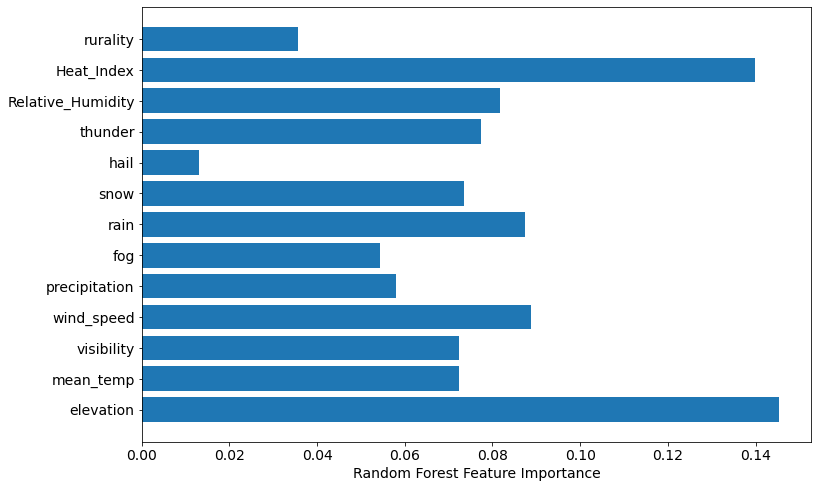

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8, 12,  5,  4,  2,  1,  7,  9, 10,  6,  3, 11,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.01313068, 0.03558044, 0.05445639, 0.05792848, 0.07225655,
       0.07242195, 0.07357246, 0.07734416, 0.08168343, 0.08737769,
       0.08883366, 0.13997664, 0.14543746])

Text(0.5, 0, 'Random Forest Feature Importance')

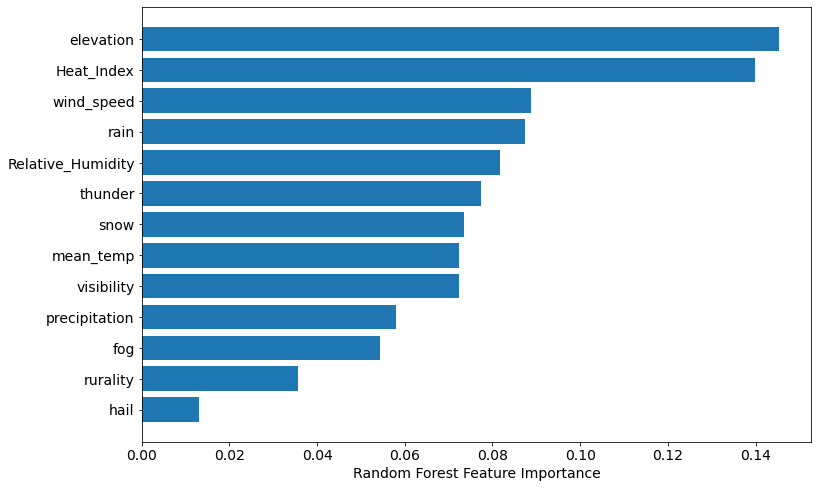

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

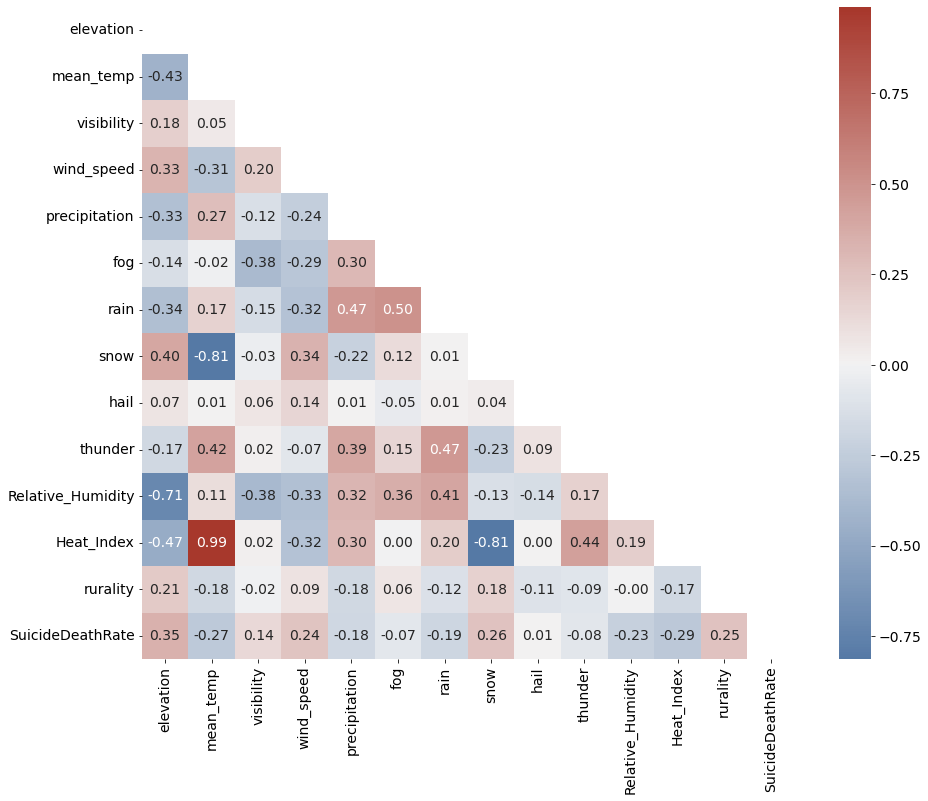

In [21]:
correlation_matrix(climate_2020)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2020.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2020 = ur_files.compute()
social_2020 = social_2020.loc[:, ~social_2020.columns.str.contains('^Unnamed')]
social_2020.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,01001,29804.0,0.152118,0.116403,0.166688,0.054131,0.189026,0.015724,0.038739,0.152591,0.035818,0.236219,0.260231,0.647028,0.010388,0.276040,"Autauga County, AL",5.419369
1,01003,33751.0,0.091737,0.100390,0.108923,0.031256,0.205768,0.015230,0.167139,0.204848,0.043809,0.215279,0.171030,0.470731,0.013533,0.183638,"Baldwin County, AL",8.722693
2,01005,20074.0,0.285999,0.261505,0.276632,0.111457,0.307314,0.037546,0.014100,0.190881,0.067907,0.208663,0.547191,0.625344,0.116279,0.540406,"Barbour County, AL",9.361067
3,01007,22626.0,0.180981,0.203478,0.319448,0.066263,0.289358,0.012536,0.024683,0.164298,0.021306,0.204881,0.255833,0.486243,0.074059,0.367041,"Bibb County, AL",4.507058
4,01009,25457.0,0.137361,0.184483,0.224651,0.050790,0.247931,0.018156,0.006843,0.179759,0.067410,0.231530,0.133149,0.525806,0.009765,0.225584,"Blount County, AL",3.357026


In [23]:
social_2020['SuicideDeathRate'].isna().sum()

196

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2020 = social_2020.dropna(how = 'any')

In [25]:
social_2020.shape

(3024, 18)

In [26]:
X = social_2020.iloc[:, 1:-2].values
y = social_2020.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.0528664 , 0.05187132, 0.11220105, 0.06838781, 0.06225029,
       0.06741372, 0.08488201, 0.05053429, 0.07464304, 0.06731418,
       0.07799624, 0.05376859, 0.05549182, 0.06088037, 0.05949888])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2020.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2020.shape

(3024, 18)

In [32]:
climate_2020.shape

(2876, 15)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

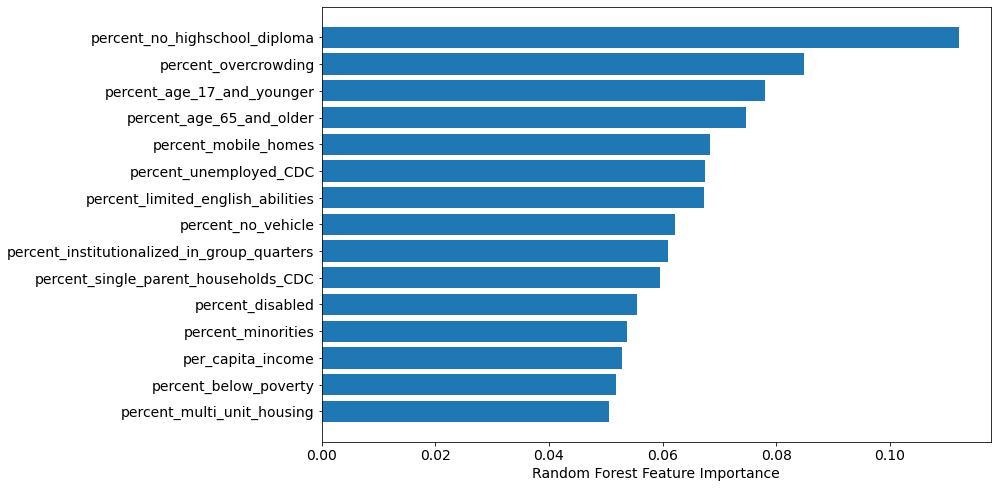

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

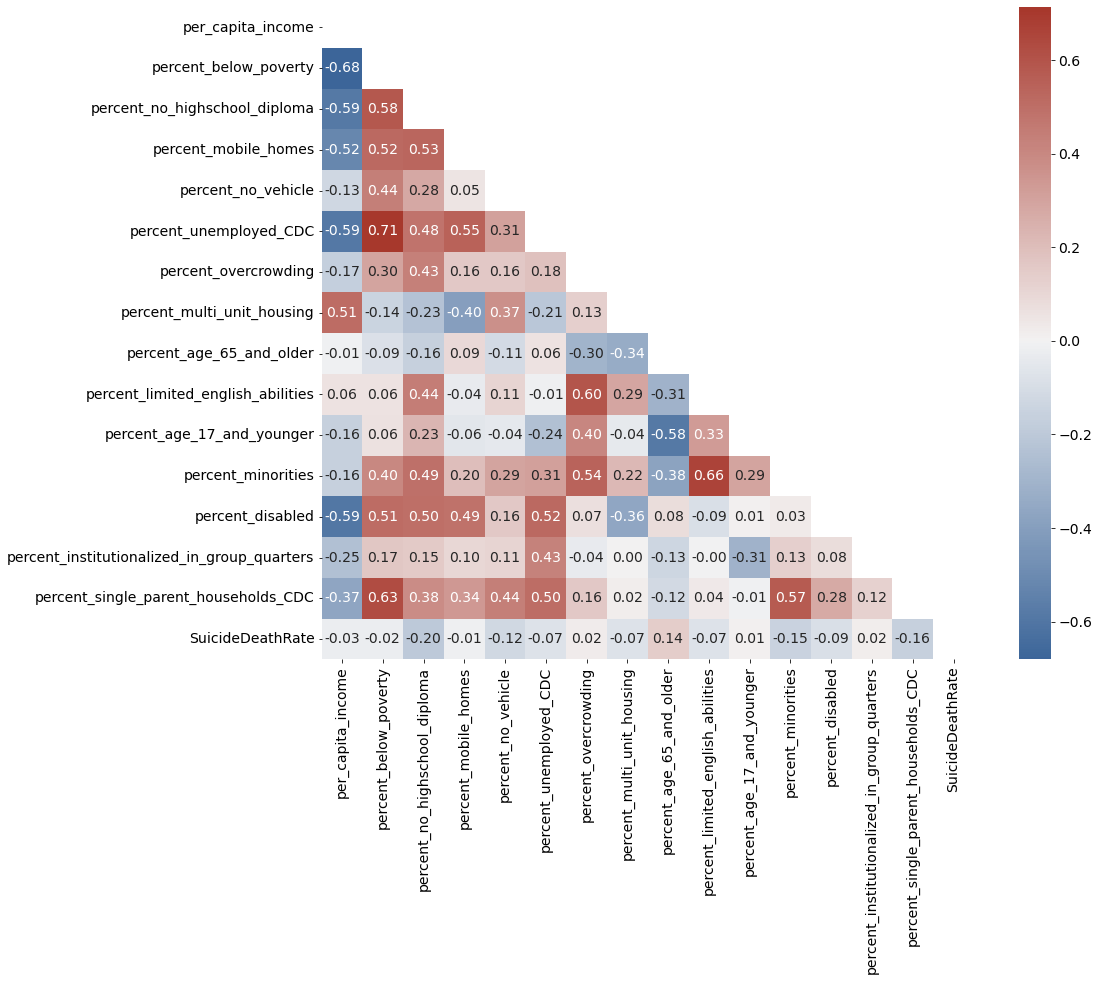

In [36]:
correlation_matrix(social_2020)

## find the rank of importances of all factors

In [37]:
df_total = social_2020.merge(climate_2020, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality
0,01001,29804.0,0.152118,0.116403,0.166688,0.054131,0.189026,0.015724,0.038739,0.152591,...,4.196802,0.190582,30.117647,155.000000,0.705882,0.0,45.529412,72.441193,66.733307,3.0
1,01003,33751.0,0.091737,0.100390,0.108923,0.031256,0.205768,0.015230,0.167139,0.204848,...,3.963549,0.080860,13.488372,34.906977,0.000000,0.0,11.488372,78.214097,69.488485,4.0
2,01005,20074.0,0.285999,0.261505,0.276632,0.111457,0.307314,0.037546,0.014100,0.190881,...,3.097790,0.096706,16.000000,39.888889,0.000000,0.0,8.888889,72.878378,59.999685,6.0
3,01007,22626.0,0.180981,0.203478,0.319448,0.066263,0.289358,0.012536,0.024683,0.164298,...,4.395276,0.156465,24.250000,109.500000,0.250000,0.0,36.250000,73.841053,63.784285,2.0
4,01009,25457.0,0.137361,0.184483,0.224651,0.050790,0.247931,0.018156,0.006843,0.179759,...,4.475978,0.133215,11.312500,74.125000,0.750000,0.0,22.187500,69.557608,62.180748,2.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index', 'rurality'],
      dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index',
       'fog', 'rain', 'snow', 'hail', 'thunder','rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(2875, 31)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,precipitation,Relative_Humidity,Heat_Index,fog,rain,snow,hail,thunder,rurality,SuicideDeathRate
0,01001,"Autauga County, AL",0.152118,29804.0,0.189026,0.116403,0.152591,0.236219,0.647028,0.276040,...,0.190582,72.441193,66.733307,30.117647,155.000000,0.705882,0.0,45.529412,3.0,5.419369
1,01003,"Baldwin County, AL",0.091737,33751.0,0.205768,0.100390,0.204848,0.215279,0.470731,0.183638,...,0.080860,78.214097,69.488485,13.488372,34.906977,0.000000,0.0,11.488372,4.0,8.722693
2,01005,"Barbour County, AL",0.285999,20074.0,0.307314,0.261505,0.190881,0.208663,0.625344,0.540406,...,0.096706,72.878378,59.999685,16.000000,39.888889,0.000000,0.0,8.888889,6.0,9.361067
3,01007,"Bibb County, AL",0.180981,22626.0,0.289358,0.203478,0.164298,0.204881,0.486243,0.367041,...,0.156465,73.841053,63.784285,24.250000,109.500000,0.250000,0.0,36.250000,2.0,4.507058
4,01009,"Blount County, AL",0.137361,25457.0,0.247931,0.184483,0.179759,0.231530,0.525806,0.225584,...,0.133215,69.557608,62.180748,11.312500,74.125000,0.750000,0.0,22.187500,2.0,3.357026


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.02368581, 0.02503862, 0.02036106, 0.02856036, 0.02581   ,
       0.02269989, 0.02599302, 0.02293942, 0.04355266, 0.02397554,
       0.01732524, 0.02615174, 0.03563398, 0.02888193, 0.03003021,
       0.12838939, 0.03816376, 0.05385564, 0.05461536, 0.03659933,
       0.04438153, 0.08716227, 0.02689016, 0.03846799, 0.0271625 ,
       0.01027688, 0.04093092, 0.01246475])

In [47]:
len(rf.feature_importances_)

28

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

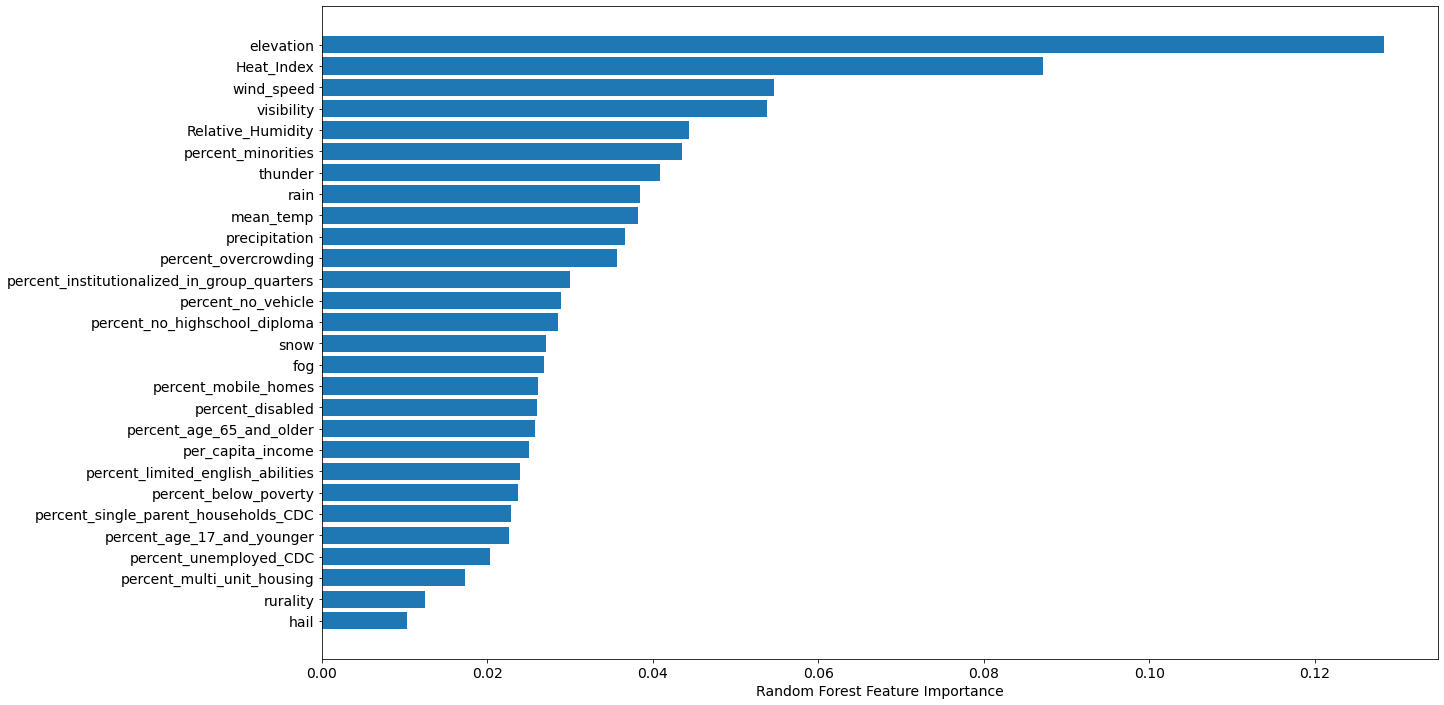

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SHAP

In [53]:
import xgboost
import shap

In [58]:
climate_2020.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality,SuicideDeathRate
0,01001,75.264706,65.805031,9.316751,4.196802,0.190582,30.117647,155.000000,0.705882,0.0,45.529412,72.441193,66.733307,3.0,5.419369
1,01003,12.427907,70.433061,9.238159,3.963549,0.080860,13.488372,34.906977,0.000000,0.0,11.488372,78.214097,69.488485,4.0,8.722693
2,01005,94.311111,61.456968,9.185657,3.097790,0.096706,16.000000,39.888889,0.000000,0.0,8.888889,72.878378,59.999685,6.0,9.361067
3,01007,162.637500,64.168787,9.348708,4.395276,0.156465,24.250000,109.500000,0.250000,0.0,36.250000,73.841053,63.784285,2.0,4.507058
4,01009,243.931250,61.962995,9.399952,4.475978,0.133215,11.312500,74.125000,0.750000,0.0,22.187500,69.557608,62.180748,2.0,3.357026


In [59]:
X = climate_2020.iloc[:, 1:-1]
y = climate_2020.iloc[:, -1].array

In [61]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


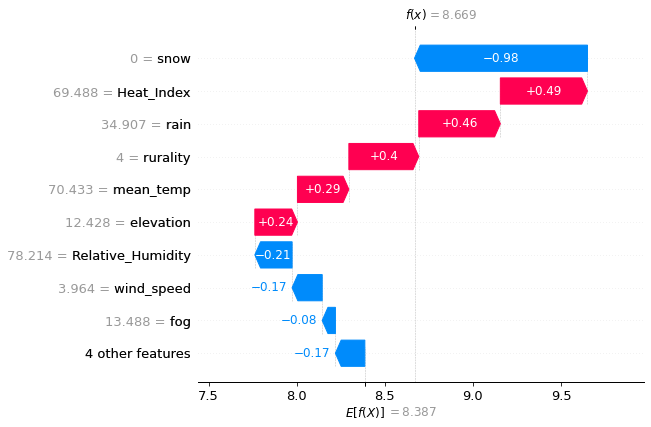

In [62]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

#### The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

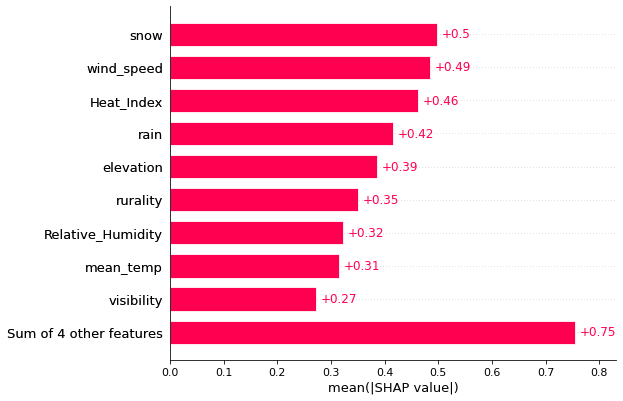

In [63]:
shap.plots.bar(shap_values)

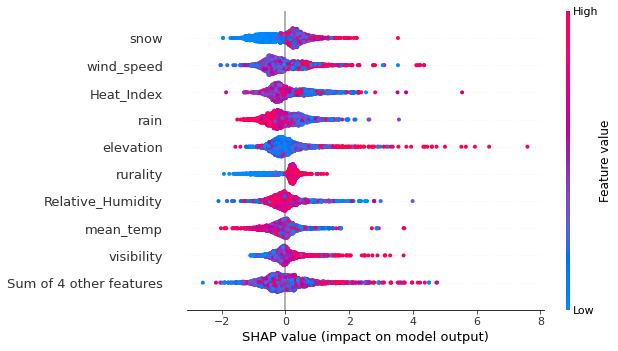

In [64]:
shap.plots.beeswarm(shap_values)

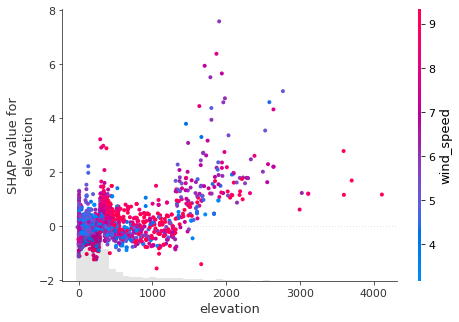

In [65]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

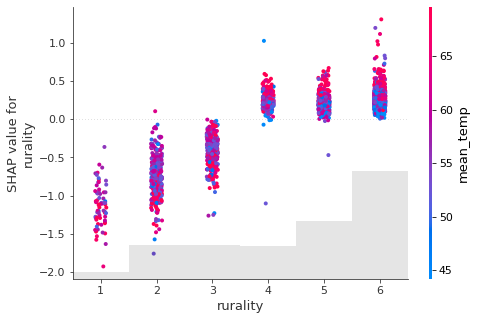

In [66]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

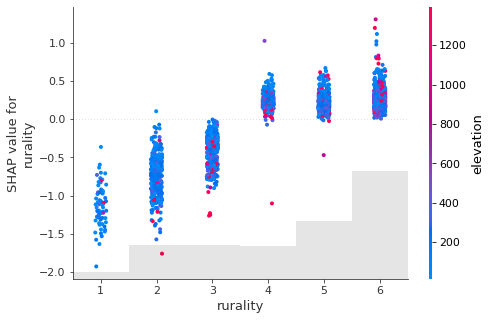

In [67]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

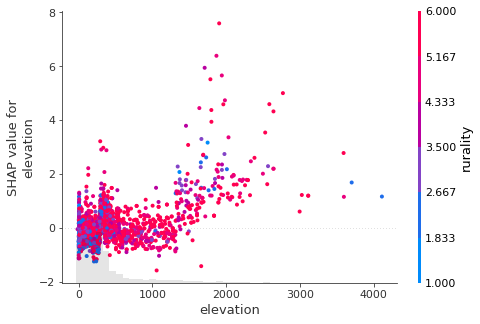

In [68]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

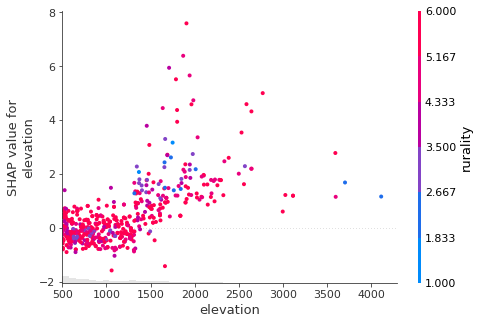

In [69]:
shap.plots.scatter(shap_values[:,"elevation"],shap_values[:,"rurality"], xmin=500)

### scatter plot will pick the best feature to color by automatically

### social economic factors

In [70]:
social_2020.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,01001,29804.0,0.152118,0.116403,0.166688,0.054131,0.189026,0.015724,0.038739,0.152591,0.035818,0.236219,0.260231,0.647028,0.010388,0.276040,"Autauga County, AL",5.419369
1,01003,33751.0,0.091737,0.100390,0.108923,0.031256,0.205768,0.015230,0.167139,0.204848,0.043809,0.215279,0.171030,0.470731,0.013533,0.183638,"Baldwin County, AL",8.722693
2,01005,20074.0,0.285999,0.261505,0.276632,0.111457,0.307314,0.037546,0.014100,0.190881,0.067907,0.208663,0.547191,0.625344,0.116279,0.540406,"Barbour County, AL",9.361067
3,01007,22626.0,0.180981,0.203478,0.319448,0.066263,0.289358,0.012536,0.024683,0.164298,0.021306,0.204881,0.255833,0.486243,0.074059,0.367041,"Bibb County, AL",4.507058
4,01009,25457.0,0.137361,0.184483,0.224651,0.050790,0.247931,0.018156,0.006843,0.179759,0.067410,0.231530,0.133149,0.525806,0.009765,0.225584,"Blount County, AL",3.357026


In [71]:
X = social_2020.iloc[:, 1:-2]
y = social_2020.iloc[:, -1].array

In [72]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


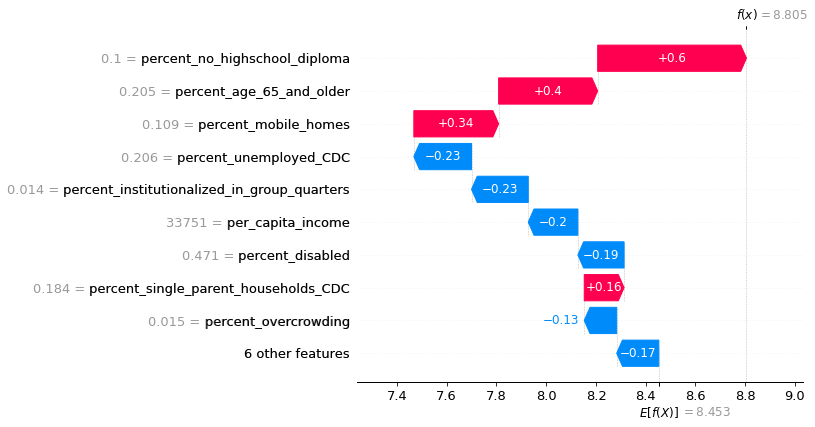

In [73]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

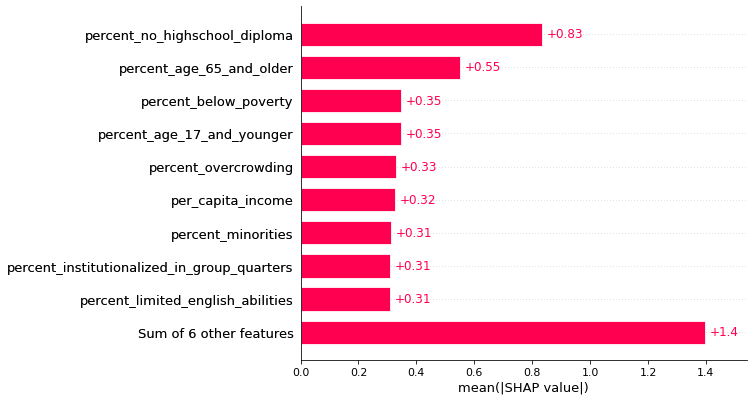

In [74]:
shap.plots.bar(shap_values)

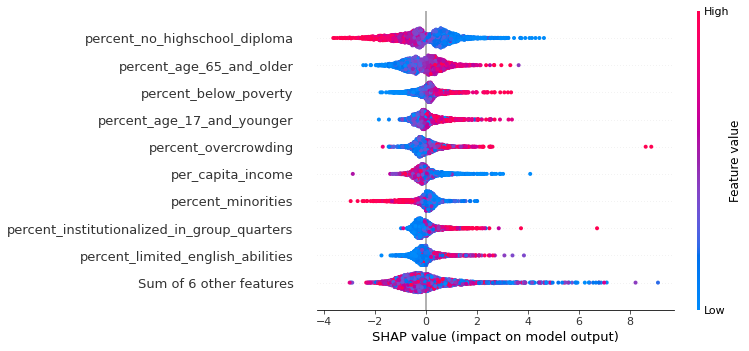

In [75]:
shap.plots.beeswarm(shap_values)

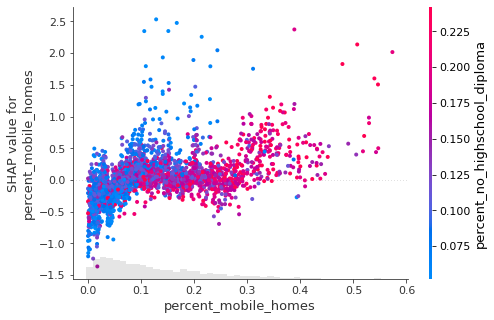

In [76]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)

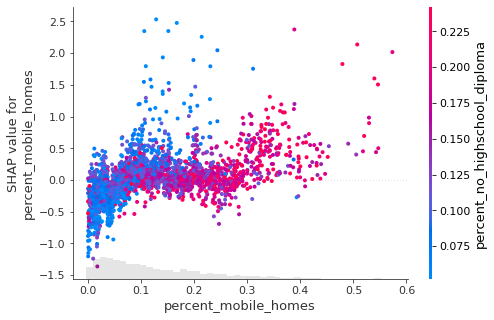

In [77]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)